## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import collections

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, average_precision_score
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

## Importing the dataset

The dataset can be found at the link : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Checking for missing values

In [5]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Checking for data imbalance

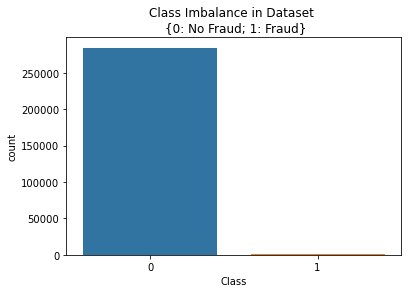

In [6]:
sns.countplot(df['Class'])
plt.title('Class Imbalance in Dataset \n {0: No Fraud; 1: Fraud}');

Class 0 represents 'No Frauds' while Class 1 represents 'Fraud'. Clearly the dataset has a lot of imbalance as a lot of data is for Class 0 which is "No Frauds'.

### Visualizing the data distributions

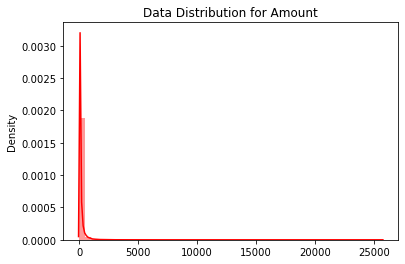

In [7]:
sns.distplot(df.Amount.values, color='r')
plt.title('Data Distribution for Amount');

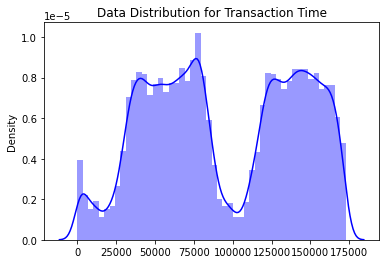

In [8]:
sns.distplot(df.Time.values, color='b')
plt.title('Data Distribution for Transaction Time');

### Features Density Plot

<Figure size 432x288 with 0 Axes>

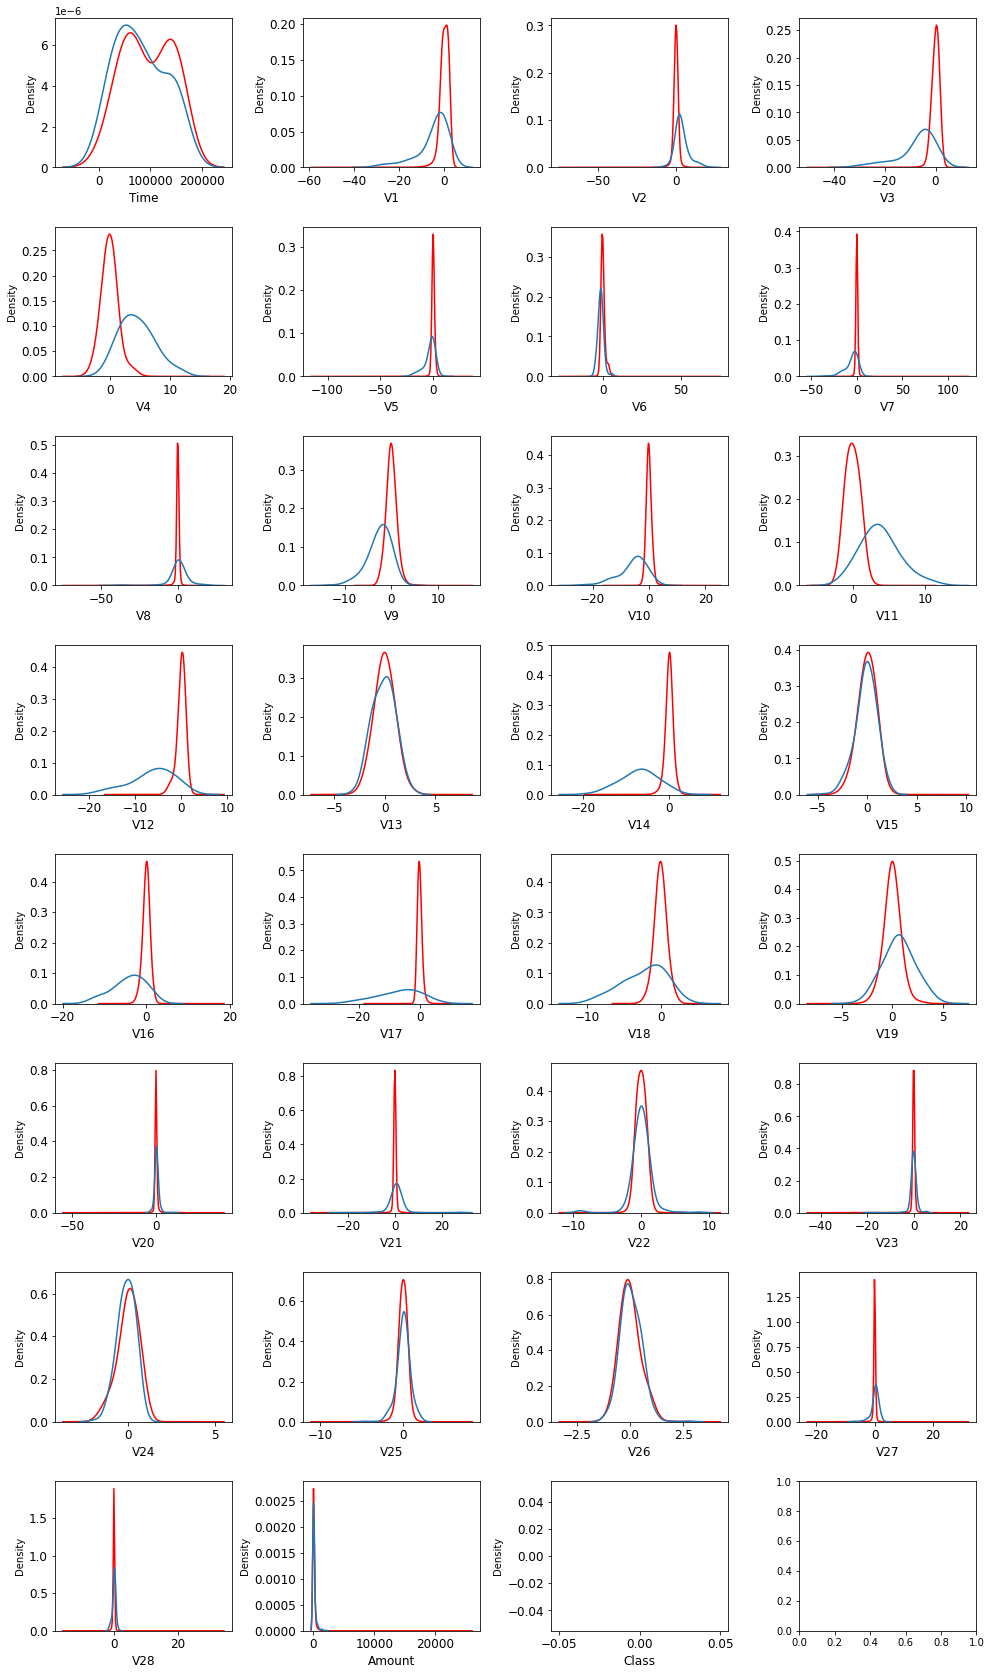

In [9]:
features = df.columns.values

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in features:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0", color='red')
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show();

Distribution of Class 0 is plotted in red while distribution of Class 1 is plotted in blue.

Observations:

1) Features V4 and V11 have clearly separated distributions for Class 0 and 1.

2) Following the same trend, features V12, V14, V18 are partially separated for Class 0 and 1.

3) V1, V2, V3, V10 have a quite distinct profile.

4) V25, V26, V28 have similar profiles for the two values of `Class`.

## Data Preprocessing

1) The dataset mentions that all columns with the exception of Time and Amount are scaled. Therefore, we need to scale these two columns as well.

2) The dataset also has a huge amount of imbalance so that needs to be dealt with too.


### Feature Scaling

We use RobustScaler() as it is less prone to outliers.

In [10]:
from sklearn.preprocessing import RobustScaler
robust_scaler =  RobustScaler()
df['amount_scaled'] = robust_scaler.fit_transform(df.Amount.values.reshape(-1,1))
df['time_scaled'] = robust_scaler.fit_transform(df.Time.values.reshape(-1,1))
df.drop(['Time','Amount'], axis=1, inplace=True)

In [11]:
df.insert(0, 'amount_scaled', df.pop('amount_scaled'))
df.insert(1, 'time_scaled', df.pop('time_scaled'))
df.head()

,amount_scaled,time_scaled,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


### Oversampling using SMOTE

In [12]:
X = df.drop(columns='Class')
y = np.ravel(df.Class)
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (284807, 30)
Shape of y: (284807,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=12)

In [14]:
# sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
# # rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)
# log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
# grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)

# accuracy_lst = []
# precision_lst = []
# recall_lst = []
# f1_lst = []
# auc_lst = []

# for train, test in sss.split(X_train, y_train):
#     pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), grid_log_reg) # SMOTE happens during Cross Validation not before..
#     model = pipeline.fit(X_train.iloc[list(train)], y_train[train])
#     best_est = grid_log_reg.best_estimator_
#     prediction = best_est.predict(X_train.iloc[list(test)])
    
#     accuracy_lst.append(pipeline.score(X_train.iloc[list(test)], y_train[test]))
#     precision_lst.append(precision_score(y_train[test], prediction))
#     recall_lst.append(recall_score(y_train[test], prediction))
#     f1_lst.append(f1_score(y_train[test], prediction))
#     auc_lst.append(roc_auc_score(y_train[test], prediction))
    
# print("accuracy: {}".format(np.mean(accuracy_lst)))
# print("precision: {}".format(np.mean(precision_lst)))
# print("recall: {}".format(np.mean(recall_lst)))
# print("f1: {}".format(np.mean(f1_lst)))
# print("ROC AUC Score: {}".format(np.mean(auc_lst)))

In [15]:
# labels = ['No Fraud', 'Fraud']
# smote_prediction = best_est.predict(X_test)
# print(classification_report(y_test, smote_prediction, target_names=labels))

In [16]:
# print("Accuracy on Test Data : ", accuracy_score(y_test, smote_prediction))
# print("Precision on Test Data : ", precision_score(y_test, smote_prediction))
# print("Recall on Test Data : ", recall_score(y_test, smote_prediction))
# print("F-1 Score on Test Data : ", f1_score(y_test, smote_prediction))
# print("ROC AUC Score on Test Data : ", roc_auc_score(y_test, smote_prediction))
# y_score = best_est.decision_function(X_test)
# average_precision = average_precision_score(y_test, y_score)
# print('Average precision-recall score: {0:0.2f}'.format(average_precision))

In [17]:
sm = SMOTE(random_state=12)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

## Logistic Regression

We perform GridSearchCV on LogisticRegression to find the optimal hyperparameters.

In [18]:
cv = KFold(n_splits=10)
parameters = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
lr = LogisticRegression(random_state=12)
clf = GridSearchCV(lr, parameters, cv=cv, verbose=5, n_jobs=-1)
clf.fit(X_train_res, y_train_res)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LogisticRegression(random_state=12), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             verbose=5)

In [19]:
clf.best_params_

{'C': 10, 'penalty': 'l2'}

The Logistic Regression model is trained using the optimal hyperparameters we got using GridSearchCV and is fit on the training data. We make predictions on the validation data.

In [20]:
model_lr = LogisticRegression(**clf.best_params_, random_state=12, verbose=5)
model_lr.fit(X_train_res, y_train_res)
predictions = model_lr.predict(X_val)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.6s finished


### Evaluating the model and comparing validation data metrics and test data metrics

In [21]:
print('Validation Results')
print('Accuracy: ', accuracy_score(y_val, predictions))
print("Precision : ", precision_score(y_val, predictions, average='weighted'))
print("Recall : ", recall_score(y_val, predictions, average='weighted'))
print("F-1 Score : ", f1_score(y_val, predictions, average='weighted'))
print("ROC AUC Score : ", roc_auc_score(y_val, predictions))
y_val_score = model_lr.decision_function(X_val)
average_precision = average_precision_score(y_val, y_val_score)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))
print()

print('Test Results')
predictions = model_lr.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, predictions))
print("Precision : ", precision_score(y_test, predictions, average='weighted'))
print("Recall : ", recall_score(y_test, predictions, average='weighted'))
print("F-1 Score : ", f1_score(y_test, predictions, average='weighted'))
print("ROC AUC Score : ", roc_auc_score(y_test, predictions))
y_test_score = model_lr.decision_function(X_test)
average_precision = average_precision_score(y_test, y_test_score)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Validation Results
Accuracy:  0.9708744357130915
Precision :  0.9982775822535968
Recall :  0.9708744357130915
F-1 Score :  0.9836992101956308
ROC AUC Score :  0.9508177366498143
Average precision-recall score: 0.81

Test Results
Accuracy:  0.9704364313050806
Precision :  0.9981340769196467
Recall :  0.9704364313050806
F-1 Score :  0.9834373102795941
ROC AUC Score :  0.920678267086238
Average precision-recall score: 0.70


In [22]:
# params = {'max_depth': [3,6], 
#           'learning_rate': [0.01, 0.05],
#           'n_estimators': [500],
#           'colsample_bytree': [0.3, 0.7],
#          }

# model_xgb = xgb.XGBClassifier(random_state=12)
# clf = RandomizedSearchCV(estimator=model_xgb, 
#                    param_distributions=params,
#                    scoring='f1_weighted', cv=5, verbose=5, n_jobs=-1)
# clf.fit(X_train_res, y_train_res)
# print("Best parameters:", clf.best_params_)

## XGBoost

Next, XGBoost Classifier is implemented. We use hyperopt to perform hyperparameter tuning on our classifier.

In [27]:
## Hyperopt
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
space={'max_depth': hp.quniform("max_depth", 3, 9, 1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.3,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 500
    }

def hyperparameter_tuning(space):
    model = xgb.XGBClassifier(n_estimators =space['n_estimators'], max_depth = int(space['max_depth']),
                              min_child_weight=space['min_child_weight'], colsample_bytree=space['colsample_bytree'])
    evaluation = [(X_train, y_train), (X_val, y_val)]
    
    model.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)

    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    #change the metric if you like
    return {'loss': -accuracy, 'status': STATUS_OK, 'model': model}

In [30]:
trials = Trials()
best = fmin(fn=hyperparameter_tuning,
            space=space,
            algo=tpe.suggest,
            max_evals=5,
            trials=trials)

print (best)

SCORE:                                               
0.9994967405170698                                   
SCORE:                                                                          
0.9995084442259752                                                              
SCORE:                                                                          
0.9994850368081645                                                              
SCORE:                                                                          
0.9994382219725431                                                              
SCORE:                                                                          
0.9994850368081645                                                              
100%|██████████| 5/5 [04:38<00:00, 55.75s/trial, best loss: -0.9995084442259752]
{'colsample_bytree': 0.9149498671541092, 'max_depth': 8.0, 'min_child_weight': 4.0}


With the optimal parameters we got above, we train our classifer using them and fit the data on the training set.

In [38]:
model_xgb = xgb.XGBClassifier(colsample_bytree=0.9149498671541092,
                              max_depth=8, min_child_weight=4, random_state=12)
model_xgb.fit(X_train_res, y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.9149498671541092, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=8,
              max_leaves=0, min_child_weight=4, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=12,
              reg_alpha=0, reg_lambda=1, ...)

In [45]:
predictions = model_xgb.predict(X_val)

### Evaluating the Model and comparing validation data metrics and test data metrics

In [46]:
print('Validation Results')
print('Accuracy: ', accuracy_score(y_val, predictions))
print("Precision : ", precision_score(y_val, predictions, average='weighted'))
print("Recall : ", recall_score(y_val, predictions, average='weighted'))
print("F-1 Score : ", f1_score(y_val, predictions, average='weighted'))
print("ROC AUC Score : ", roc_auc_score(y_val, predictions))
print()

print('Test Results')
predictions = model_xgb.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, predictions))
print("Precision : ", precision_score(y_test, predictions, average='weighted'))
print("Recall : ", recall_score(y_test, predictions, average='weighted'))
print("F-1 Score : ", f1_score(y_test, predictions, average='weighted'))
print("ROC AUC Score : ", roc_auc_score(y_test, predictions))

Validation Results
Accuracy:  0.999481692024745
Precision :  0.999484310508652
Recall :  0.999481692024745
F-1 Score :  0.9994829664752138
ROC AUC Score :  0.9256085911058071

Test Results
Accuracy:  0.999403110845827
Precision :  0.9993902646179578
Recall :  0.999403110845827
F-1 Score :  0.9993958439555468
ROC AUC Score :  0.9012315815465185
